# Týden 1, Den 1/3
## 0. Obsah:

- [Instalace VS Code](https://code.visualstudio.com/download)
- Soubory .py a .ipynb
- Opakování základů Pythonu
    - Proměnné a typy (`str`, `int`, `float`, `bool`)
    - Podmínky (`if`, `elif`, `else`, `match/case`)
    - Smyčky (`while`, `for`)
    - Kolekce (`list`, `tuple`, `set`, `dict`) + slicování
    - Mutable a immutable typy
    - Funkce a metody
    - Knihovny a jejich importování
    - Základy práce se soubory + context managery
- Čtyři pilíře programování (Informatika, Počítačové technologie, Kódování, Algoritmizace)
- Objektově orientované programování (OOP)
    - Koncept
    - Dědičnost
    - Polymorfismus
    - Instanční vs. Statické proměnné, funkce a metody
    - Jednoduchý příklad dict vs. Objekt
    - Dataclasses
- Úvod do psaní větších programů / projektů
    - Zásady psaní čitelného kódu
        - Samodokumentace
        - Docstringy
        - Komentáře
        - Dokumentace (`README.md`)
    - Strukturování kódu do souborů a složek
        - Import částí kódu
        - Knihovny
        - Implicitní spouštění a main blok / main thread check
        - Specifika VSCode pro import a práci se soubory
    - Verzovací systém (Git + GitHub)
        - Registrace na [GitHubu](https://github.com/)
        - Stažení [Gitu](https://git-scm.com/downloads)
        - Příkazy `init`, `status`, `add`, `commit`, `push`, `pull`
        - Soubor `.gitignore`
        - Vlastní soubor `README.md`
        - Vytvoření vlastního repozitáře
        - Větvení (branchování) a sdružování (mergování)
- **Příště:** Příklady často používaných knihoven a práce s nimi
    - Numpy
    - Matplotlib
    - CV2
    - Pandas
    - PyGame
    - TkInter
- **Příště:** Představení projektu
    - Webová aplikace pro zobrazení a analýzu burzovních dat
    - Typické členení aplikací
        - Definice pojmů a jejich vztah
            - Backend
            - Frontend
            - Client
            - Server
            - API (a REST API)
            - GUI


## 1. Soubory `.py` a `.ipynb`

Soubory s příponou `.py` jsou soubory zdrojového kódu v jazyce Python. Budeme je používat pro souvislý vývoj projektu a nějaké rychlé ukázky.

Proti tomu soubory s příponou `.ipynb` jsou soubory tzv. Jupyterového notebooku, což je formát připomínající poznámkový blok, ve kterém je možné kombinovat poznámky v jazyce Markdown (`.md`), matematické formule v jazyce LaTeX a úryvky kódu v jazyce (nejen) Python.
Tento formát slouží především k prezentaci souvislých témat s demonstračními prográmky - jako je tenhle soubor.

## 2. Opakování základů Pythonu

### Proměnné a typy

In [1]:
'Ahoj', 3, 3.14 # Jsou konstanty
a = 'Ahoj'      # a je proměnná s hodnotou 'Ahoj' typu tzv. "řetězce", neboli string
b = 3           # b je proměnná typu celé číslo (integer -> int)
c = 3.14        # c je proměnná typu číslo s plovoucí desetinnou čárkou (floating point number -> float)
d = 3.          # d taky - hodnota proměnné d je 3.00
e = True        # e je proměnná typu pravdivostní hodnota (boolean -> bool)
f = 3 > 5       # f taky - pravdivostní hodnota je cokoliv, co může být vyhodnoceno jako Pravda (True) nebo Nepravda (False)
                #  této vlastnosti využijeme v podmínkách:

print(f'{type(a)=}')
print(f'{type(b)=}')
print(f'{type(c)=}')
print(f'{type(d)=}')
print(f'{type(e)=}')
print(f'{type(f)=}')

type(a)=<class 'str'>
type(b)=<class 'int'>
type(c)=<class 'float'>
type(d)=<class 'float'>
type(e)=<class 'bool'>
type(f)=<class 'bool'>


### Podmínky

In [30]:
stock_price_usd = 12.50

if stock_price_usd < 10:
    print("Možná bych měl koupit...")
elif stock_price_usd > 15:
    print("Možná bych měl prodat...")
else:
    print("Měl bych ještě čekat.")
# Tohle není finanční poradenství

Měl bych ještě čekat.


In [3]:
# Proměnné a jejich hodnoty přetrvávají mezi buňkami v .ipynb:

# Lepší způsob jak přistoupit k takovým podmínkám:
output_text = "Měl bych ještě čekat." # Výchozí hodnota v proměnné
if stock_price_usd < 10:              # Změna jen v případě zvýšení/snížení
    output_text = "Možná bych měl koupit..."
elif stock_price_usd > 15:
    output_text = "Možná bych měl prodat..."

print(output_text)                    # Jen jedno volání print() -> Lepší čitelnost

Měl bych ještě čekat.


In [ ]:
from enum import Enum, auto
import requests as reqs

POSTCODES_IO_URL = "https://api.postcodes.io"

class PostcodeStatus(Enum):
    INVALID = auto()
    LIVE = auto()
    TERMINATED = auto()
    UNKNOWN = auto()

def postcode_status(postcode: str) -> PostcodeStatus:
    with reqs.get(f"{POSTCODES_IO_URL}/terminated_postcodes/{postcode}") as resp:
        match resp.json():
            case {"status" : 200}:
                return PostcodeStatus.TERMINATED
            case {"status" : 404, "error" : "Invalid postcode"}:
                return PostcodeStatus.INVALID
            case {"status" : 200, "error" : "Terminated postcode not found"}:
                return PostcodeStatus.LIVE
            case _:
                return PostcodeStatus.UNKNOWN
            
print(
    postcode_status("EC1A 1BB"),    # Live
    postcode_status("INVA LID"),    # Invalid
    postcode_status("W1A 0AA"),     # Terminated

    sep="\n"
)

PostcodeStatus.UNKNOWN
PostcodeStatus.INVALID
PostcodeStatus.TERMINATED


### Smyčky (loops)

In [4]:
stock_prices = []
for p in range(0, 100, 10):
    stock_prices.append(p)

for sp in stock_prices:
    print(f"Cena akcie je: {sp}")

Cena akcie je: 0
Cena akcie je: 10
Cena akcie je: 20
Cena akcie je: 30
Cena akcie je: 40
Cena akcie je: 50
Cena akcie je: 60
Cena akcie je: 70
Cena akcie je: 80
Cena akcie je: 90


In [5]:
# Lepší způsob jak naplnit seznam:
stock_prices = [ p for p in range(0, 100, 10) ]     # List-comprehension

for sp in stock_prices:
    print(f"Cena akcie je: {sp}")

Cena akcie je: 0
Cena akcie je: 10
Cena akcie je: 20
Cena akcie je: 30
Cena akcie je: 40
Cena akcie je: 50
Cena akcie je: 60
Cena akcie je: 70
Cena akcie je: 80
Cena akcie je: 90


In [6]:
my_stock_price = 12.50

while(my_stock_price < 30):
    print(f"Kupuju víc za {my_stock_price}")
    my_stock_price += 6.25

print(f"Prodávám všechno za {my_stock_price}")

Kupuju víc za 12.5
Kupuju víc za 18.75
Kupuju víc za 25.0
Prodávám všechno za 31.25


### Mutable a immutable typy

In [7]:
s = "This is a string"
print(s)
print(s[8:13])
# s[10:13] = "noth" # TypeError

l = list(s)
print(l)
print(l[8:13])
l[8:13] = list("noth")
print(l)
s = "".join(l)
print(s)

This is a string
a str
['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'a', ' ', 's', 't', 'r', 'i', 'n', 'g']
['a', ' ', 's', 't', 'r']
['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'n', 'o', 't', 'h', 'i', 'n', 'g']
This is nothing


### Kolekce

In [8]:
S = "abcdefghij,abcdefghij" # string is not a collection

l = list(S)     # mutable
t = tuple(S)    # immutable
s = set(S)      # mutable
d = { k : v for v, k in enumerate(S)} # key: char in string; value: last position index in string
                                      # mutable
print(S)
print(l)
print(t)
print(s)
print(d)

abcdefghij,abcdefghij
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', ',', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', ',', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j')
{'e', 'a', 'j', 'h', ',', 'i', 'd', 'f', 'g', 'c', 'b'}
{'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, ',': 10}


### Funkce a metody

In [9]:
from time import localtime

def methodM1():
    print("Hello from M1")

def methodM2(par):
    print(f"Hello from M2, {par}")

def functionF1():
    return localtime().tm_year

def functionF2(a, b=12):
    return a*b

methodM1()
methodM2("how are you?")

a = functionF1()
b = functionF2(2)
print(a)
print(b)

Hello from M1
Hello from M2, how are you?
2025
24


### Knihovny a jejich importování

In [10]:
import json
import numpy as np
from time import localtime, perf_counter as pc

### Základy práce se soubory

In [11]:
f = open("files/file.txt", "w")
f.write("This is a file")
f.close()

In [12]:
# Lepší způsob jak zacházet se soubory: Context managery
with open("files/file.txt", "w") as f:
    f.write("This is a context managed file")
#f.close() is called automagically with un-indent - even if code crashes within it!

## 3. Čtyři pilíře programování
Programátor se typicky neobejde alespoň bez základní znalosti všech čtyř, ale nutnost se nějakému z nich věnovat extenzivně, vyplývá spíše ze zaměření.

### Matematika
Informatika obecně je věda vycházející z velké části z pokroku matematiky. Pomocí matematiky nejen analyzujeme algoritmy a jejich efektivitu, ale objekty, kterými často popisujeme datové struktury, nebo algoritmy, bývají většinou inherentně matematické.

Povětšinou se v Informatice setkáme s matematickými odvětvími jako teorie grafů, teorie množin, statistika, různé disciplíny diskrétní matematiky, jako je kombinatorika, ale i matematická analýza.

Některá, už spíše informatická odvětví, přímo těží z těch matematických - například teorie složitosti a vyčíslitelnosti, nebo algoritmizace.


### Počítačové technologie
Tušit, z čeho se skládá počítač, jaká je architektura jeho komponent, nebo co je spolu spojuje, případně jak a kdy pracuje s pamětí jsou možná specifické drobnosti, ale podle odvětví, ve kterém se programátor pohybuje mohou více či méně ovlivnit různá rozhodnutí během vývoje i chování programu.


### Kódování
Kódování je ryzí znalost konkrétního programovacího jazyka a schopnost přepsat teoretický algoritmus do jeho syntaxe - pokud možno s co nejméně oklikami, efektivně, elegantně a čitelně.


### Algoritmizace
Je především schopnost problém rozdělit na menší díly a ty za pomoci dostupných elementárních úkonů vyřešit. Algoritmické myšlení je do jisté míry třeba trénovat a velmi rychle jde pak vypěstovat schopnost různé problémy převádět na jiné, nebo intuitivně tušit jak efektivní bude řešení zadaného problémů za různých okolností.

---

Každý programátor potřebuje znát jazyk, ve kterém píše, ale podle zaměření může a nemusí znát detaily různých knihoven, nebo balíčků.

Bude se zásadně lišit, jakou matematiku musí ovládat Frontend developer, datový analytik, nebo herní vývojář. Bude se různit, kolik o architektuře procesorů potřebuje znát programátor operačních systémů, nebo uživatelských aplikací, atd.

## 4. Objektově orientované programování
### Koncept
Typicky si během vývoje nevystačíme jen se základními datovými strukturami, které nám dobře vychované programovací jazyky poskytnou. Ať už je potřeba datová struktura, která data nějak zpracovává a vyžadujeme od ní specifické chování a máme nějaké nároky na její efektivitu při různých operacích s daty v ní (Fronty, Zásobníky, Haldy, Stromy, Spojové seznamy atp.) a nebo chceme reprezentovat nějaké chování objektů mezi sebou (Maticové operace, Diskrétní datové simulace, Protagonista a nepřátelé ve hře), programovací jazyky nám typicky dovolují si vytvořit vlastní objekty, kterými můžeme takové struktury pohodlněji reprezentovat.

Jde to i bez nich? Ano, ale pak se ztrácí čitelnost, přehlednost, ale i modularita a (jednoduchá) rozšiřitelnost.

Objektový přístup k programování nám pomáhá tyhle vlastnosti našeho kódu zachovat tím, že vytvářeným strukturám propůjčuje intuici objektů z našeho reálného světa.
Představme si strukturu (odteď už objekt) reprezentující auto, které má barvu, SPZ, počet sedadel, ale umí například i zatáčet a troubit. Nebo různé druhy zvířat, která mají název, čeleď, druh, průměrný vrůst a oblíbený zvuk, který umějí vydávat.

Takové objekty se v Pythonu nazývají Třídy (Class). Vlastnosti jim přiřazujeme pomocí proměnných, kterým říkáme Atributy, a činnosti je učíme pomocí funkcí, které mohou být tzv. Instanční (umí je každý objekt zvlášť) nebo statické (týkají se naší třídy, ale nemusí se týkat konkrétních jedinců (instancí))


### Dědičnost
Jedna z výhod objektového přístupu je tzv. dědičnost (Inheritance), která dovoluje odvozovat nové třídy od jiných, čímž můžeme šetřit opakování kódu pro podobné třídy.

Představme si příklad se zvířaty.
Každé zvíře má oblíbený zvuk a nějak se jmenují. Některá zvířata ale umí věci, které jiná neumí. Dává tedy smysl mít třídu Animal, ale jak odlišit ryby, které umí plavat, od ptáků, kteří létají?

Jedna z možností by byla mít spousty booleovských proměnných typu `can_fly`, `can_swim`, `can_breathe_underwater`, ale to přestane být velmi rychle přehledné.

Místo toho od třídy Animal můžeme vytvořit dědící třídy Fish a Bird, které budou mít všechny atributy i funkce třídy Animal, ale můžeme k nim připsat další, například funkci `lay_eggs()`, která je specifická pro ptáky.


### Polymorfismus
Díky dědičnosti dostáváme skoro zdarma tzv. Polymorfismus, což je schopnost chovat se ke skupinám objektů podle jejich nejmladšího společného dědice. Nemusíme se například bát na množině skládajcí se z ptáků, ryb a hadů zavolat funkci `make_a_sound()` protože dělat zvuky umějí všechny objekty typu Animal, ale třeba vlastnost `color_of_scales` už zjistit nemůžeme, protože šupiny mají jen ryby a hadi.

### Instanční vs. Statické proměnné, funkce a metody

In [13]:
from typing import override

def spacer():
    print()
    print("---")
    print()

class Animal:
    def __init__(self, name):
        self.name = name

    def make_a_sound(self):
        print("Generic growl")

    def get_name(self):
        print(f"I am {self.name}, the {type(self).__name__}!")

    @staticmethod
    def get_name_static(a):
        print(f"This {type(a).__name__} is called {a.name}")

class Dog(Animal):
    def __init__(self, name, breed):
        self.breed = breed
        super().__init__(name)

    @override
    def make_a_sound(self):
        print("Woof!")

class PoliceDog(Dog):
    def __init__(self, name, breed, unit):
        self.unit = unit
        super().__init__(name, breed)
    
    @override
    def make_a_sound(self):
        print("WeeeeWooooWeeeeWoooo")

a = Animal("Andy")
a.get_name()
Animal.get_name_static(a)

spacer()

d = Dog("DD", "Labrador")
d.get_name()
Animal.get_name_static(d)
Dog.get_name_static(a)

spacer()

p = PoliceDog("Pinky", "Malinois", "K9")
p.get_name()
Animal.get_name_static(p)
Dog.get_name_static(p)

I am Andy, the Animal!
This Animal is called Andy

---

I am DD, the Dog!
This Dog is called DD
This Animal is called Andy

---

I am Pinky, the PoliceDog!
This PoliceDog is called Pinky
This PoliceDog is called Pinky


In [14]:
from dataclasses import dataclass

# @dataclass
class Vector2:
    # X: float
    # Y: float

    def __init__(self, x, y):
        self.X, self.Y = x, y

    def __repr__(self):
        return f"{self.X}, {self.Y}"

    def add(self, other):
        return Vector2(self.X + other.X, self.Y + other.Y)
    
    def dot(self, other):
        return self.X * other.X + self.Y * other.Y
    
    def scalar(self, alpha):
        return Vector2(alpha * self.X, alpha * self.Y)
    


    @staticmethod
    def add_(a, b):
        return Vector2(a.X + b.X, a.Y + b.Y)
    
    @staticmethod
    def dot_(a, b):
        return a.X * b.X + a.Y * b.Y
    
    @staticmethod
    def scalar_(a, alpha):
        return Vector2(alpha * a.X, alpha * a.Y)
    

    def __add__(self, other):
        return Vector2(self.X + other.X, self.Y + other.Y)
    
    # def __mul__(self, other):
    #     return self.X * other.X + self.Y * other.Y
    
    def __mul__(self, alpha:float):
        return Vector2(alpha * self.X, alpha * self.Y)
    
a = Vector2(5, 3)
b = Vector2(6, 6)
k = 3.

print(
    a.add(b),
    Vector2.add_(a, b),
    Vector2.add(a, b),
    a + b,
    "",
    a.dot(b),
    a * k,

    sep="\n"
)

11, 9
11, 9
11, 9
11, 9

48
15.0, 9.0


In [15]:
vecA = {"X" : 5, "Y" : 3}
vecB = {"X" : 6, "Y" : 6}

def vec_add(a, b):
    return {
        "X" : a["X"] + b["X"],
        "Y" : a["Y"] + b["Y"]
    }

vec_add(vecA, vecB)

{'X': 11, 'Y': 9}

### Dataclasses

In [16]:
from dataclasses import dataclass, field

@dataclass
class InvoiceItem:
    name:str
    unit_name:str = "h"
    unit_quantity:float = 1.
    unit_price:float = 350.

    def total_cost(self) -> float:
        return self.unit_price * self.unit_quantity
    
@dataclass
class Invoice:
    number:str
    items:list[InvoiceItem] = field(default_factory=list)

    def total_cost(self) -> float:
        return sum(
            (item.total_cost() for item in self.items)
        )


a = InvoiceItem("jablko", "ks", 12, 23.99)
b = InvoiceItem("mrkev", "ks", 4, 17.50)
c = InvoiceItem("portret")

C = Invoice("01042525", [a, b, c])


print(
    a, b, c,
    C,
    C.total_cost(),

    sep="\n"
)

InvoiceItem(name='jablko', unit_name='ks', unit_quantity=12, unit_price=23.99)
InvoiceItem(name='mrkev', unit_name='ks', unit_quantity=4, unit_price=17.5)
InvoiceItem(name='portret', unit_name='h', unit_quantity=1.0, unit_price=350.0)
Invoice(number='01042525', items=[InvoiceItem(name='jablko', unit_name='ks', unit_quantity=12, unit_price=23.99), InvoiceItem(name='mrkev', unit_name='ks', unit_quantity=4, unit_price=17.5), InvoiceItem(name='portret', unit_name='h', unit_quantity=1.0, unit_price=350.0)])
707.88


## Úvod do psaní větších programů / projektů
### Zásady čitelného kódu
Kdy není třeba psát čitelný kód?

Pokud jde o rychlý projekt, ve kterém si potřebujeme něco spočítat, vyzkoušet, udělat demo, prototyp, nebo koncept pro větší projekt - kdykoliv, kdy kód, který píšeme nehodláme sdílet, rozvíjet déle jak pár dní na více než menší jednotky stovek řádků, můžeme si zásady čistého a čitelného kódu vesměs odpustit.
Proč?
Takový kód velmi rychle a inherentně ztrácí přehlednost - typicky nemá dobře vymyšlený objektový návrh, strukturu souborů, nemá nijak zvlášť dobře pojmenované třídy, funkce, ani proměnné, a ačkoliv se autorovi může zdát, že v projektu má přehled, ten se velmi rychle ztratí s časovým odstupem.

---

Vždycky je potřeba si při psaní kódu rozmyslet, jestli bude třeba kód v budoucnu rozvíjet (měl by být modulární?) a pokud ano, čistým kódem zajistit, aby jeho modularita nebyla nepříjemná z důvodu jeho nepřehlednosti.

Dál je potřeba si rozmyslet, jestli na projektu budeme pracovat sami, nebo v teamu. Pokud se v budoucnosti najde v programu chyba, je možné, že ji bude hledat a opravovat jiný programátor? Pokud ano, je na nás, abychom čistým kódem zajistili, aby měl co nejjednoduší práci.

Kdy tedy čistý kód psát?
Když na projektu spolupracujeme, je dostatečně velký a významný, nebo jej budeme vyvíjet/upravovat v průběhu delšího časového úseku, nebo se k němu vracet.

---

Jaké jsou zásady čitelného kódu?
- #### 1. Samodokumentace
Nejdůležitější je tzv. samodokumentace.
Je to proces intuitivního pojmenovávání proměnných, funkcí, tříd, případně dalších částí kódu (souborů, složek, balíčků, jmenných prostorů atp.)

Veškerý kód, který má více než jen pár řádků, by měl být samodokumentující a k dalším zásadám přistupujeme postupně až když k dostatečné přehlednosti kódu tahle nestačí.

- #### 2. Docstringy
Ke každé třídě a funkci můžeme v pythonu připsat tzv. Docstring, ve kterém vysvětlíme její účel, nastíníme rozhodnutí implementace, nebo vysvětlíme její **signaturu**.

**Signatura** je kombinace jména, parametrů a někdy i návrhového vzoru nějaké implementace. Vesměs se jedná o množinu prvků, které definují popisovanou strukturu.

Docstringy se často v intergrovaných prostředích zobrazují při našeptávání, nebo najetí na jméno struktury, která docstring má.

- #### 3. Komentáře
Pokud nestačí dobré názvy doplněné o docstringy, dobře vychované programovací jazyky mívají možnost psát do kódu komentáře, ve kterých se dá více či méně rozšafně vysvětlovat veškeré záměry autora, další myšlenkové pochody, návrhy na alternativní implementace, nebo i instrukce ostatním programátorům pracujícím na stejném projektu.

- #### 4. Dokumentace
Je-li třeba - ať už, protože kód i při využití všech ostatních zásad stále není dostatečně přehledný, nebo s našim programem bude pracovat spostu dalších, potenciálně cizích, programátorů (open source) nebo uživatelů - může být dobré vytvořit formální dokumentaci, která je plně oddělená od kódu.

Jedná se o soubor dokumentů, které popisují buď implementační detaily, signaturu všech částí kódu, strukturu projektu, vývojová rozhodnutí, omezení, poznámky k modularitě a rozšiřitelnosti atp. - Pokud váš kód budou používat další programátoři, například pokud vyvíjte knihovnu pro řešení nějakého problému, nebo se podílíte na vývoji nějakého projektu v zaměstnání, nebo open source komunitě.

V jiném případě můžete v dokumentaci popisovat uživatelskou část vašeho programu. Pokud je váš kód například uživatelskou, nebo webovou aplikací, dokumentace by měla pojednávat o účelu programu, jak jej ovládat, jak skrze něj navigovat, jak si jej přizpůsobit a podobně.



### Strukturování kódu do souborů a složek
Podobně, jako kód samotný můžeme strukturovat do funkcí a tříd, tyhle větší bloky můžeme třídit do jednotlivých souborů a soubory do složek.

Některé knihovny to dělají automaticky a nebo dokonce předpokládají, že konkrétní kusy kódu, nebo jiné vstupní soubory (html stránky, obrázky...) budou ve specifických složkách.

Pravděpodobně se na jednu takovou knihovnu podíváme v průběhu tohohle kurzu: Flask

### Verzovací systém
Verzovací systém je algoritmus, který si pomocí chytré datové struktury (povětšinou nějaká forma semiperzistentního zakořeněného stromu) umí pamatovat jednotlivé úpravy v historii našich projektů a nad takovými "verzemi" umí dělat různé operace.

Mezi takové operace patří kromě přidávání nových verzí třeba paralelní vývoj v několika větvích a pak jejich chytré sloučení tak, aby se zachovaly změny v různých částech kódu, a rozhodlo se o těch změnách, které se zachovají, pokud se týkají stejných částí kódu.

Takový systém pomáhá při spolupráci teamů na větších projektech.

Typicky se používá Git a projekty se sdílí přes platformy jako GitHub, GitLab, nebo třeba Microsoft Azure DevOps Repos.

Todo git

## Příklady často používaných knihoven a práce s nimi
### 1. Numpy

In [17]:
import numpy as np

In [18]:
a = np.array([1, 1, 1])
print(a)            # Řádkový vektor
print(a[:, None])   # Sloupcový vektor
print(a[:, None].T) # Transpozice

# Operace "po složkách"
print(a+3)
print(a*3)
print(a/3)

spacer()

b = np.array([1, 2, 3])

print(a+b)
print(a-b)
print(a*b)
print(a/b)

print(a@b)
print(b@a)
print(np.dot(a, b))

spacer()

M = np.array([[1, 1, 1], [1, 1, 1]])
print(M)
print(M.T)

print(M + 5)
print(M * 5)
print(M / 5)

spacer()

N = np.array([[1, 2, 3], [4, 5, 6]])

print(M+N)
print(M-N)
print(M*N)
print(M/N)

print(M@N.T)        # Maticové násobení
print(N@M.T)

spacer()

c = np.array([2, 4])
print(c@N)
print(N.T@c[:, None])

spacer()




[1 1 1]
[[1]
 [1]
 [1]]
[[1 1 1]]
[4 4 4]
[3 3 3]
[0.33333333 0.33333333 0.33333333]

---

[2 3 4]
[ 0 -1 -2]
[1 2 3]
[1.         0.5        0.33333333]
6
6
6

---

[[1 1 1]
 [1 1 1]]
[[1 1]
 [1 1]
 [1 1]]
[[6 6 6]
 [6 6 6]]
[[5 5 5]
 [5 5 5]]
[[0.2 0.2 0.2]
 [0.2 0.2 0.2]]

---

[[2 3 4]
 [5 6 7]]
[[ 0 -1 -2]
 [-3 -4 -5]]
[[1 2 3]
 [4 5 6]]
[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[ 6 15]
 [ 6 15]]
[[ 6  6]
 [15 15]]

---

[18 24 30]
[[18]
 [24]
 [30]]

---



In [19]:
#Indexování do matic / n-dimenzionálních polí
X = np.arange(3*4*5)
X = X.reshape((3, 4, 5))

print(X.shape)
print(X)
spacer()
print(X[1,1,1])
print(X[:, 1, :])
print(X[1, :, 1])
spacer()
print(X[1][1][1:])

(3, 4, 5)
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]
  [30 31 32 33 34]
  [35 36 37 38 39]]

 [[40 41 42 43 44]
  [45 46 47 48 49]
  [50 51 52 53 54]
  [55 56 57 58 59]]]

---

26
[[ 5  6  7  8  9]
 [25 26 27 28 29]
 [45 46 47 48 49]]
[21 26 31 36]

---

[26 27 28 29]


In [20]:
# Generování dat
a = np.array([[3, 5, 1], [2, 9, 3]])

print(
    np.arange(2, 16),
    np.linspace(2, 16, 5, dtype=int),
    np.linspace([1, 3, 5], [5, 9, 13], 5),
    np.random.randint(2, 16, (2, 3)),
    np.eye(4, dtype=int),
    np.ones((3, 2), dtype=int),
    np.tile([1, 5, 10], (3, 2)),

    np.zeros_like(a, dtype=float),

    np.random.choice([1, 5, 7], (12, 12), p=[0.5, 0.4, 0.1]),
    sep="\n\n"
)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]

[ 2  5  9 12 16]

[[ 1.   3.   5. ]
 [ 2.   4.5  7. ]
 [ 3.   6.   9. ]
 [ 4.   7.5 11. ]
 [ 5.   9.  13. ]]

[[ 9  9 10]
 [ 7  5  6]]

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]

[[1 1]
 [1 1]
 [1 1]]

[[ 1  5 10  1  5 10]
 [ 1  5 10  1  5 10]
 [ 1  5 10  1  5 10]]

[[0. 0. 0.]
 [0. 0. 0.]]

[[5 1 5 7 1 5 5 5 5 1 1 5]
 [1 5 5 5 5 1 1 5 7 1 7 5]
 [1 5 7 1 1 1 1 1 1 1 1 7]
 [5 5 5 1 5 1 5 5 1 5 7 1]
 [1 5 5 5 5 5 1 1 5 1 5 7]
 [5 7 1 1 1 5 1 1 5 5 1 1]
 [1 1 1 1 5 1 5 5 5 5 5 5]
 [5 5 5 1 1 1 7 1 1 1 7 1]
 [5 1 1 1 1 1 5 5 5 5 1 1]
 [7 1 5 1 1 1 1 5 5 5 1 1]
 [1 5 7 1 5 1 1 1 1 5 1 1]
 [7 5 1 5 7 1 7 5 1 5 5 5]]


### 2. Matplotlib

In [21]:
#todo matplotlib

### 3. OpenCV (CV2)

In [22]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

def show(*images, size=5, cols=2, titles=None):
    n_images = len(images)
    if n_images == 1: cols = 1
    rows = (n_images + cols - 1) // cols

    # Assume all images are roughly same size (or take the first as reference)
    height, width = images[0].shape[:2]
    
    # Set figure size to match the total pixel size exactly
    dpi = 100  # You can tweak DPI if needed
    fig_width = (width * cols) / dpi
    fig_height = (height * rows) / dpi

    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height), dpi=dpi)
    axes = np.array(axes).reshape(-1)  # Flatten in case it's 2D array

    fig.patch.set_facecolor('none')

    for i, ax in enumerate(axes):
        ax.set_facecolor('none')
        ax.axis('off')

        if i < n_images:
            img_rgb = cv.cvtColor(images[i].astype(np.uint8), cv.COLOR_BGR2RGB)
            ax.imshow(img_rgb)
            if titles and i < len(titles):
                ax.set_title(titles[i], fontsize=8)
    
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.01, hspace=0.01)
    plt.show()


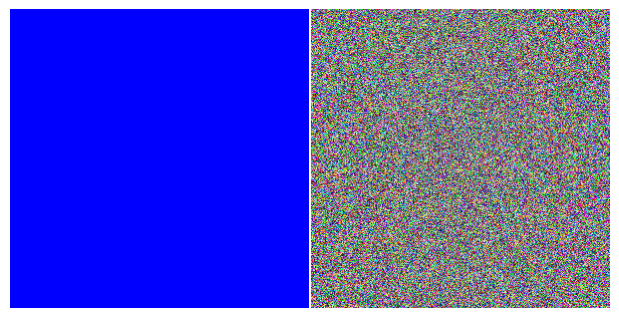

In [23]:
# Showing green image

# 3 channels of 8-bit color, 300x300 resolution, blank:
img = np.zeros((300, 300, 3), dtype=np.uint8)

# Fill with blue (BGR):
img[:] = (255, 0, 0)

# Fill with random noice
img2 = np.random.random((300, 300, 3)) * 255
show(img, img2, cols=2)

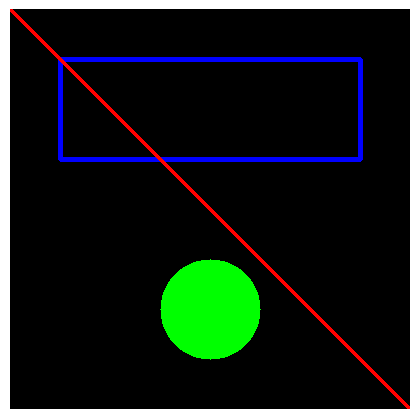

In [24]:
# drawing shapes:
img = np.zeros((400, 400, 3), dtype=np.uint8)

# Draw a blue rectangle
cv.rectangle(img, (50, 50), (350, 150), (255, 0, 0), thickness=3)

# Draw a green circle
cv.circle(img, (200, 300), 50, (0, 255, 0), thickness=-1)

# Draw a red line
cv.line(img, (0, 0), (400, 400), (0, 0, 255), thickness=2)

show(img)

(512, 512, 3) (512, 512)


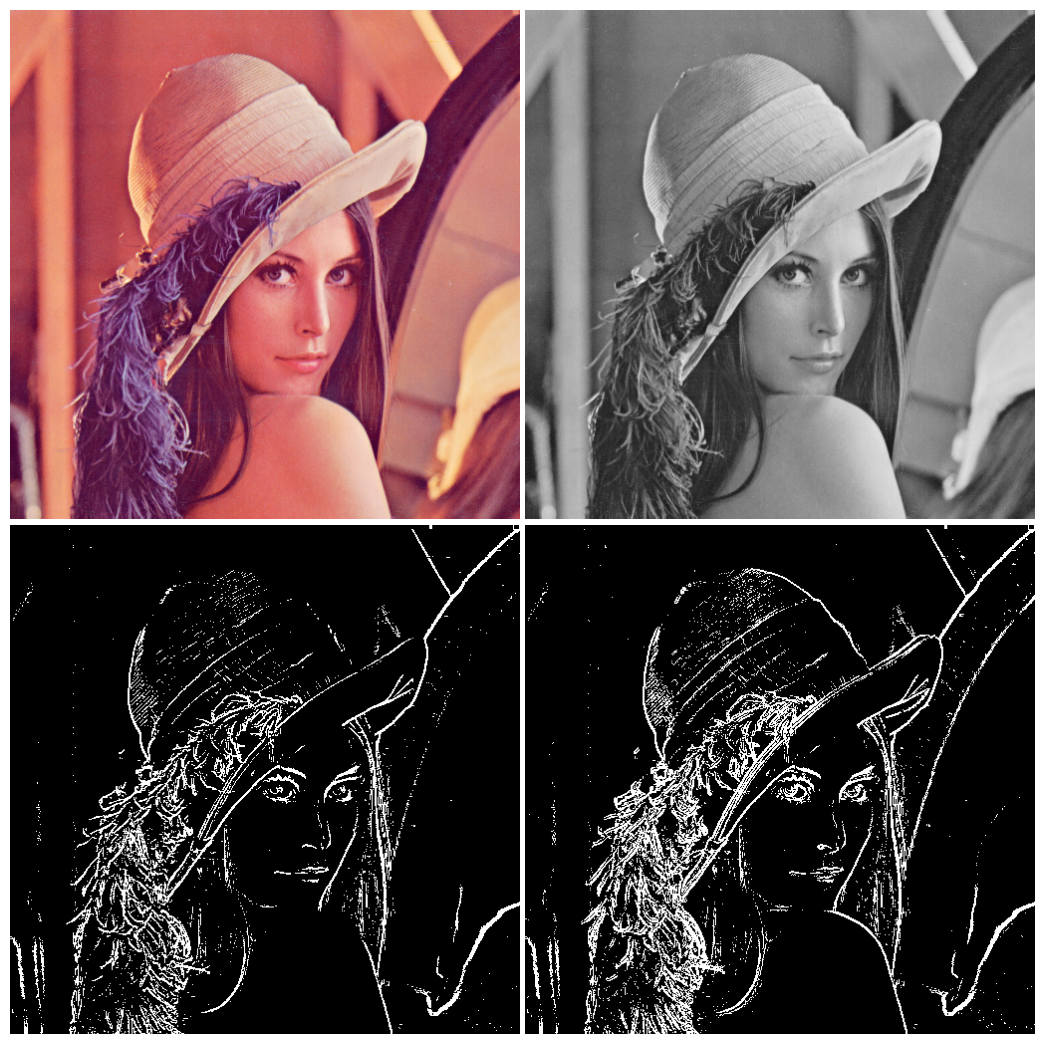

In [25]:
# loading image

img = cv.imread("images/lena_color_512.tif")
if img is None:
    print("None")
    exit()


# image processing:
img_grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(img.shape, img_grayscale.shape)


 # edge detection:
def roberts(img, thresh, basic = False):
    mask_cardinal = np.array([[0, 1], [-1, 0]])
    mask_diagonal = np.array([[-1, 1]])

    g1 = cv.filter2D(img, ddepth=-1, kernel=mask_cardinal)
    g2 = cv.filter2D(img, ddepth=-1, kernel=np.rot90(mask_cardinal))

    g3 = cv.filter2D(img, ddepth=-1, kernel=mask_diagonal)
    g4 = cv.filter2D(img, ddepth=-1, kernel=mask_diagonal.T)

    edges1 = np.hypot(g1, g2) >= thresh
    edges2 = np.hypot(g3, g4) >= thresh

    edges = edges1 if basic else (edges1 | edges2)
    return edges.astype(np.uint8) * 255


img_rob_basic = roberts(img_grayscale, 20, True)
img_rob = roberts(img_grayscale, 20)

show(img, img_grayscale, img_rob_basic, img_rob)

# Other edge detection kernels: Prewitt, Sobel, Kirsch, *Canny*


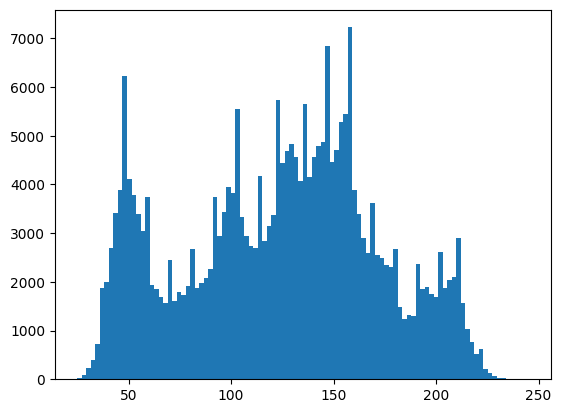

In [26]:
# histogram

plt.hist(img_grayscale.flatten(), 100)
plt.show()